# Importing basic libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv", sep=";")
data.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


# Basic EDA


In [3]:
data.shape

(70000, 13)

In [4]:
data.drop('id',axis=1,inplace=True)
data.drop_duplicates(inplace=True)
data.shape

(69976, 12)

In [5]:
data['age']=data['age']/365

In [6]:
data.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1


In [7]:
data = data.astype({'age':'int'})
data = data.astype({'weight':'int'})
data.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,51,1,165,64,130,70,3,1,0,0,0,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69976 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          69976 non-null  int64
 1   gender       69976 non-null  int64
 2   height       69976 non-null  int64
 3   weight       69976 non-null  int64
 4   ap_hi        69976 non-null  int64
 5   ap_lo        69976 non-null  int64
 6   cholesterol  69976 non-null  int64
 7   gluc         69976 non-null  int64
 8   smoke        69976 non-null  int64
 9   alco         69976 non-null  int64
 10  active       69976 non-null  int64
 11  cardio       69976 non-null  int64
dtypes: int64(12)
memory usage: 6.9 MB


In [9]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,52.840874,1.349648,164.359152,74.207157,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,6.767103,0.476862,8.211218,14.397407,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
out_filter = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
data = data[~out_filter]

In [11]:
data.shape

(68983, 12)

In [12]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68983.000000,68983.000000,68983.000000,68983.000000,68983.000000,68983.000000,68983.000000,68983.000000,68983.000000,68983.000000,68983.000000,68983.000000
mean,52.826899,1.348811,164.359523,74.119276,126.298160,81.332111,1.364496,1.225911,0.087891,0.053607,0.803270,0.494948
std,6.770369,0.476597,8.205082,14.330110,17.889741,9.890964,0.678761,0.571868,0.283139,0.225243,0.397529,0.499978
min,29.000000,1.000000,55.000000,11.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [14]:
data.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1


<Axes: >

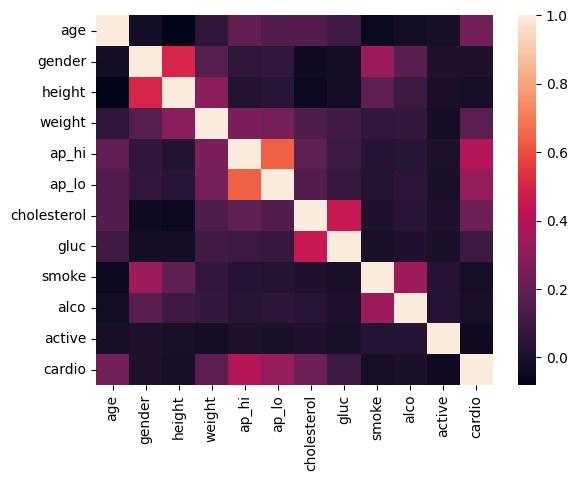

In [15]:
sns.heatmap(data.corr())

In [16]:
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023132,-0.080736,0.055070,0.195526,0.150283,0.154936,0.098818,-0.047790,-0.029116,-0.010461,0.239566
gender,-0.023132,1.000000,0.498026,0.155833,0.056949,0.064708,-0.036813,-0.021055,0.338627,0.170974,0.005487,0.007456
height,-0.080736,0.498026,1.000000,0.291564,0.017727,0.035771,-0.050458,-0.018512,0.187974,0.094475,-0.007302,-0.010400
weight,0.055070,0.155833,0.291564,1.000000,0.253286,0.244890,0.140564,0.106860,0.066708,0.067866,-0.017901,0.179876
ap_hi,0.195526,0.056949,0.017727,0.253286,1.000000,0.640397,0.184618,0.087632,0.028228,0.031559,0.000949,0.397351
ap_lo,0.150283,0.064708,0.035771,0.244890,0.640397,1.000000,0.155268,0.075991,0.024611,0.042912,-0.001050,0.328110
cholesterol,0.154936,-0.036813,-0.050458,0.140564,0.184618,0.155268,1.000000,0.450800,0.009811,0.035566,0.008949,0.221358
gluc,0.098818,-0.021055,-0.018512,0.106860,0.087632,0.075991,0.450800,1.000000,-0.005703,0.011207,-0.007726,0.089727
smoke,-0.047790,0.338627,0.187974,0.066708,0.028228,0.024611,0.009811,-0.005703,1.000000,0.340274,0.025729,-0.016371
alco,-0.029116,0.170974,0.094475,0.067866,0.031559,0.042912,0.035566,0.011207,0.340274,1.000000,0.025338,-0.008151


# Splitting data for training and testing

In [17]:
X=data.drop('cardio',axis=1)
y=data['cardio']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100],  # Number of trees in the forest
    'max_depth': [10], # Maximum depth of the tree
    'min_samples_split': [2],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required at a leaf node
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.7338073992865055


In [20]:
y_pred=grid_search.predict(X_test)


In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7343731879856199


In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[6844 1855]
 [2726 5821]]


In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1 = f1_score(y_test, y_pred, average='macro')                

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precision: 0.7367445955121827
Recall: 0.733907389787376
F1-Score: 0.7334352432861351
